# Explore here

In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.getenv('CLIENT_ID')
client_secret=os.getenv('CLIENT_SECRET')
print(client_id)




a97f475853ab4953a21b2037d406964e


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))

In [3]:
artist_id='5YGY8feqx7naU7z4HrwZM6'

response= con.artist_top_tracks(artist_id)

print(response)

{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5YGY8feqx7naU7z4HrwZM6'}, 'href': 'https://api.spotify.com/v1/artists/5YGY8feqx7naU7z4HrwZM6', 'id': '5YGY8feqx7naU7z4HrwZM6', 'name': 'Miley Cyrus', 'type': 'artist', 'uri': 'spotify:artist:5YGY8feqx7naU7z4HrwZM6'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF

In [4]:
if response: 
    tracks=response['tracks']
    print(tracks[0]['artists'][0]['name'])

tracks=[{k:(v/(1000*60)%60) if k=='duration_ms' else v for k,v in track.items()if k in ['name','popularity','duration_ms']} for track in tracks]

print(tracks)

Miley Cyrus
[{'duration_ms': 3.3433333333333333, 'name': 'Flowers', 'popularity': 86}, {'duration_ms': 3.367766666666667, 'name': 'Party In The U.S.A.', 'popularity': 74}, {'duration_ms': 3.2742166666666668, 'name': 'Angels Like You', 'popularity': 79}, {'duration_ms': 3.618316666666667, 'name': 'Nothing Breaks Like a Heart (feat. Miley Cyrus)', 'popularity': 76}, {'duration_ms': 3.854, 'name': "We Can't Stop", 'popularity': 78}, {'duration_ms': 3.6893333333333334, 'name': 'Wrecking Ball', 'popularity': 78}, {'duration_ms': 3.9344333333333332, 'name': 'The Climb', 'popularity': 58}, {'duration_ms': 2.822216666666667, 'name': 'Prisoner (feat. Dua Lipa)', 'popularity': 70}, {'duration_ms': 3.1864166666666667, 'name': 'Used To Be Young', 'popularity': 69}, {'duration_ms': 4.1431, 'name': 'When I Look At You', 'popularity': 59}]


In [8]:
tracks_df=pd.DataFrame.from_records(tracks)
tracks_df

,duration_ms,name,popularity
0,3.343333,Flowers,86
1,3.367767,Party In The U.S.A.,74
2,3.274217,Angels Like You,79
3,3.618317,Nothing Breaks Like a Heart (feat. Miley Cyrus),76
4,3.854000,We Can't Stop,78
5,3.689333,Wrecking Ball,78
6,3.934433,The Climb,58
7,2.822217,Prisoner (feat. Dua Lipa),70
8,3.186417,Used To Be Young,69
9,4.143100,When I Look At You,59


In [12]:
tracks_df.sort_values(['popularity'],inplace=True,ascending=False)
tracks_df

,duration_ms,name,popularity
0,3.343333,Flowers,86
2,3.274217,Angels Like You,79
5,3.689333,Wrecking Ball,78
4,3.854000,We Can't Stop,78
3,3.618317,Nothing Breaks Like a Heart (feat. Miley Cyrus),76
1,3.367767,Party In The U.S.A.,74
7,2.822217,Prisoner (feat. Dua Lipa),70
8,3.186417,Used To Be Young,69
9,4.143100,When I Look At You,59
6,3.934433,The Climb,58


In [13]:
tracks_df.head(3)

,duration_ms,name,popularity
0,3.343333,Flowers,86
2,3.274217,Angels Like You,79
5,3.689333,Wrecking Ball,78


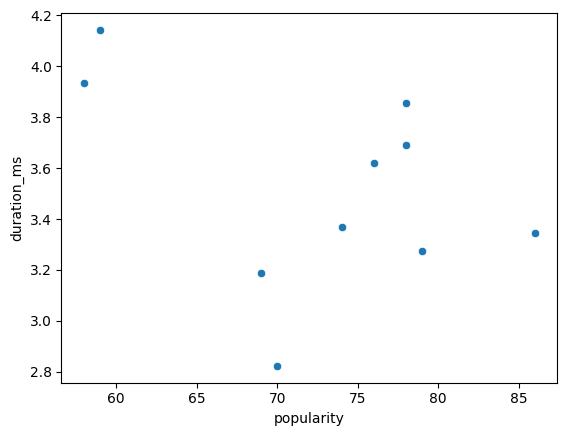

In [ ]:
import seaborn as sns

scatter_plot= sns.scatterplot(data=tracks_df,x='popularity', y='duration_ms')

fig=scatter_plot.get_figure()
fig.savefig('scatter_plot.png')
#no hay relacion con la duracion con la cancion